## HANDS OF DATA ANALISYS WITH PANDAS


Script By Rikardoroa - Just python it!

Chapter One

In [118]:
#script by rikardoroa, just python it!
#basic statistics plotting variables
import numpy as np
import random
import statistics as sty
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.mlab as mlab
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

class BasicStadistics_Plotting():
    
    #inicializating variables
    def __init__(self, df=pd.DataFrame()):
        self.df = df
        
    
    def Basic_Histogram(self):
        
        #inicializating df
        df = self.df
        ramdom_seed =[]
        seed = [ramdom_seed.extend(x) for x in [x.tolist() for x in [x.astype(int) for x in np.random.rand(10,100)*1000]]]
        df = pd.DataFrame(ramdom_seed).rename(columns={0:'seed'})
        
        #ci interval(confidence interval)
        ci = st.t.interval(alpha=0.95, df=len(df)-1, loc=np.mean(df), scale=st.sem(df)) 
        #generate histogram plot with basic variables
        fig, ax = plt.subplots(figsize=(15,12))
        mean = sty.mean(ramdom_seed)
        mode = sty.mode(ramdom_seed)
        median = sty.median(ramdom_seed)
        stdv = sty.stdev(ramdom_seed)
        #standard deviation
        positive_stdv = round(mean + stdv,1)
        negative_stdv = round(mean - stdv,1)
       
        #quartiles - pandas 
        p25 = df['seed'].quantile(0.25)  # Q25
        p75 = df['seed'].quantile(0.75)  # Q75
        
        #quartiles - numpy
        n25 = np.percentile(df.seed, 25)  # Q25
        n75 = np.percentile(df.seed, 75)  # Q75
        
        #min and max values - numpy 
        min_val = np.min(df.seed)
        max_val = np.max(df.seed)
        
        #min and max values -  pandas 
        df_min_val = df.seed.min()
        df_max_val = df.seed.max()
        
        #confidence interval construct with the standard deviation error formula
        z= 1.96
        se = stdv /np.sqrt(ramdom_seed)
        lower_bound = mean - z* se  #lower limit of the CI
        upper_bound = mean + z* se  #upper limit of the CI
        
        #Dataframes with lower and upper limits
        df2 = pd.DataFrame(lower_bound).rename(columns={0:'lower_bound'})
        df['lower_bound'] = df2[['lower_bound']]
        df3 = pd.DataFrame(upper_bound).rename(columns={0:'upper_bound'})
        df['upper_bound'] = df3[['upper_bound']]
        
        #generating graph
        ax = sns.histplot(data=df, x="seed", ax=ax, kde=True)
        ax = sns.histplot(data=df, x="lower_bound", ax=ax, kde=True, color='Crimson')
        ax = sns.histplot(data=df, x="upper_bound", ax=ax, kde=True, color='Crimson')
        ax.axvline(x=mean,color='m', linestyle='-', label="Mean")
        ax.axvline(x=mode, color='r', linestyle='--', label="Mode")
        ax.axvline(x=median, color='g', linestyle='-', label="Median")
        ax.axvline(x=positive_stdv, color='orange', linestyle='-', label="+Standard Deviation")
        ax.axvline(x=negative_stdv, color='salmon', linestyle='-', label="-Standard Deviation")
        ax.axvline(x=p25, color='navy', linestyle='-.', label="25th Percentile")
        ax.axvline(x=p75, color='brown', linestyle='-.', label="75th Percentile")
        ax.axvline(x=df_min_val, color='coral', linestyle='-.', label="Min Value")
        ax.axvline(x=df_max_val, color='chocolate', linestyle='-.', label="Max Value")
        ax.axvline(x=ci[0], color='GoldenRod', linestyle='-.', label="Lower CI")
        ax.axvline(x=ci[1], color='DarkOrchid', linestyle='-.', label="Upper CI")
        ax.text(mode,2,s=mode,horizontalalignment='center', fontweight='bold', color='black')
        ax.text(median,15,s=median,horizontalalignment='center', fontweight='bold', color='black')
        ax.text(mean,1,s=mean,horizontalalignment='center', fontweight='bold', color='black')
        ax.text(positive_stdv,1,s=positive_stdv,horizontalalignment='center', fontweight='bold', color='black')
        ax.text(negative_stdv,1,s=negative_stdv,horizontalalignment='center', fontweight='bold', color='black')
        ax.text(p25,35,s=p25,horizontalalignment='center', fontweight='bold', color='black')
        ax.text(p75,30,s=p75,horizontalalignment='center', fontweight='bold', color='black')
        ax.text(df_min_val,35,s=df_min_val,horizontalalignment='center', fontweight='bold', color='black')
        ax.text(df_max_val,35,s=df_max_val,horizontalalignment='center', fontweight='bold', color='black')
        ax.text(round(int(ci[0]),1),45,s=round(int(ci[0]),1),horizontalalignment='center', fontweight='bold', color='black')
        ax.text(round(int(ci[1]),1),55,s=round(int(ci[1]),1),horizontalalignment='center', fontweight='bold', color='black')
        ax.legend()
        plt.show()

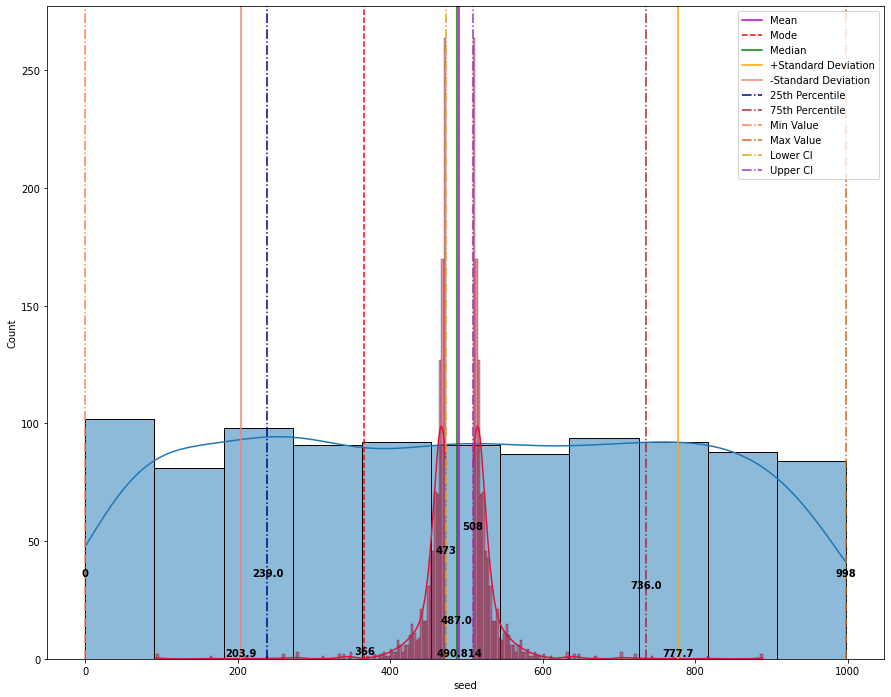

In [119]:
Basic_statistics = BasicStadistics_Plotting()

Basic_statistics.Basic_Histogram()